In [10]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})
RS = 123

In [2]:
f = open("traindata.txt")
text = f.read()
l = text.split()

data_train = []
for i in range(len(l)):
    data_train.append(l[i].split(','))
f.close()
f = open("trainlabel.txt")
text = f.read()

label_train = text.split()

from decimal import *
for it in range(len(data_train)):
    for i in range(len(data_train[it])):
        data_train[it][i] = Decimal(data_train[it][i])
    label_train[it] = int(Decimal(label_train[it]))

In [4]:
from sklearn.manifold import TSNE

tsne         = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_train,label_train)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 68054 samples in 6.167s...
[t-SNE] Computed neighbors for 68054 samples in 466.941s...
[t-SNE] Computed conditional probabilities for sample 1000 / 68054
[t-SNE] Computed conditional probabilities for sample 2000 / 68054
[t-SNE] Computed conditional probabilities for sample 3000 / 68054
[t-SNE] Computed conditional probabilities for sample 4000 / 68054
[t-SNE] Computed conditional probabilities for sample 5000 / 68054
[t-SNE] Computed conditional probabilities for sample 6000 / 68054
[t-SNE] Computed conditional probabilities for sample 7000 / 68054
[t-SNE] Computed conditional probabilities for sample 8000 / 68054
[t-SNE] Computed conditional probabilities for sample 9000 / 68054
[t-SNE] Computed conditional probabilities for sample 10000 / 68054
[t-SNE] Computed conditional probabilities for sample 11000 / 68054
[t-SNE] Computed conditional probabilities for sample 12000 / 68054
[t-SNE] Computed conditional probabilities for 

In [37]:
def fashion_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    
    plt.xlim(-50, 50)
    plt.ylim(-50, 50)
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])

    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)
    
    plt.show()
    return f, ax, sc, txts

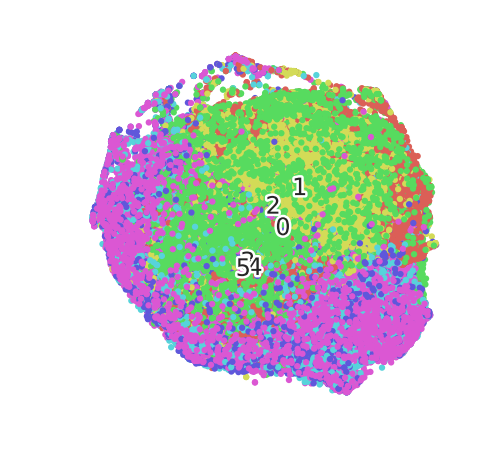

(<Figure size 576x576 with 1 Axes>,
 [Text(0.13314116, -0.34806928, '0'),
  Text(0.51652575, 0.6420955, '1'),
  Text(-0.09041032, 0.18180701, '2'),
  Text(-0.67251277, -1.1973495, '3'),
  Text(-0.5064594, -1.3380018, '4'),
  Text(-0.772233, -1.3591048, '5')])

In [38]:
fashion_scatter(tsne_results,np.array(label_train))

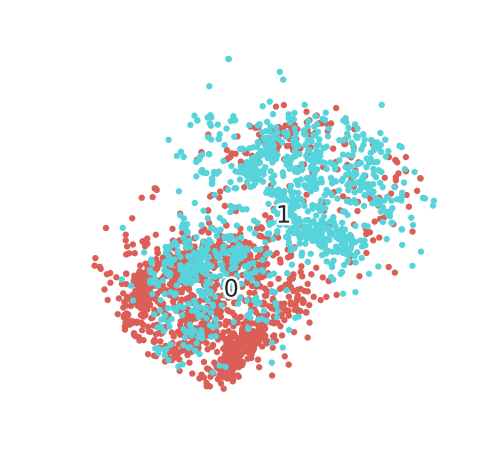

(<Figure size 576x576 with 1 Axes>,
 [Text(-0.87663436, -1.2070856, '0'), Text(0.24012764, 0.43157816, '1')])

In [39]:
fashion_scatter(tsne_results[:2433],np.array(label_train[:2433]))

(3035, 2)
(3035,)


IndexError: index 4 is out of bounds for axis 0 with size 4

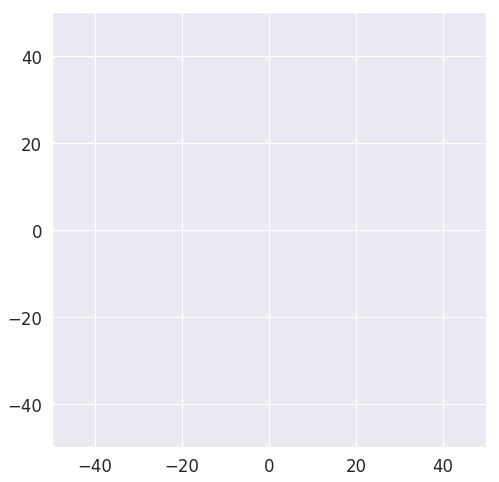

In [46]:
x = tsne_results[4032:7067][:]
y = np.array(label_train[4032:7067])

print(x.shape)
print(y.shape)
fashion_scatter(x,y)